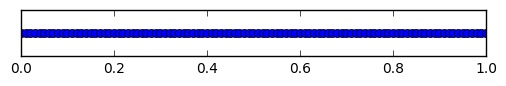

In [1]:
from fenics import *
parameters.plotting_backend = 'matplotlib'
%matplotlib inline

mesh = UnitIntervalMesh(100)
plot(mesh)

V = FunctionSpace(mesh, 'CG', 1)
thetat = TestFunction(V)
delta_theta = TrialFunction(V)

a_k = delta_theta.dx(0)*thetat.dx(0)*dx
a_g = delta_theta*thetat*dx
K = assemble(a_k)
G = assemble(a_g)

In [2]:
# Setting the eigenvalue solver
eigensolver = SLEPcEigenSolver(as_backend_type(K),as_backend_type(G))
solver_par = eigensolver.parameters
solver_par.spectrum = 'smallest real'
solver_par.problem_type = 'gen_hermitian'
solver_par.solver = 'krylov-schur'
solver_par.spectral_transform = 'shift-and-invert'
solver_par.spectral_shift = 1.
info(solver_par,True)
PETScOptions.set('eps_monitor',1)

In [3]:
# Solvethe eigenvalue problem
print('computing eigenvalues')
n_eigen = 5
eigensolver.solve(n_eigen)
print('number of iterations:', eigensolver.get_number_converged())

myfile = File('modes.pvd')

computing eigenvalues
('number of iterations:', 8)


In [4]:
mode_theta = Function(V)
for i in range(n_eigen):
    lambda_r, lambda_im, X_r, X_im = eigensolver.get_eigenpair(i)
    mode_theta.vector()[:] = X_r
    myfile << (mode_theta, float(i))
    print('eigenvalue %s = %s'%(i, lambda_r))

eigenvalue 0 = 1.06292752378e-12
eigenvalue 1 = 9.87041617022
eigenvalue 2 = 39.4914071916
eigenvalue 3 = 88.8922101969
eigenvalue 4 = 158.121585688


NameError: name 'xy_vertex_values' is not defined